Credit Card default dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [4]:
data = pd.read_csv('Sample/Credit_Card_Default.csv')
data.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1294,1295,300000.0,1,2,2,41,0,0,0,-1,...,1400.0,6297.0,977.0,1472.0,1000.0,1410.0,6297.0,0.0,19480.0,0
24767,24768,80000.0,1,2,1,39,2,0,0,0,...,63870.0,64114.0,65932.0,2800.0,3000.0,2901.0,2500.0,3000.0,5202.0,1
22903,22904,100000.0,2,2,2,27,0,0,0,0,...,49508.0,50686.0,51815.0,2000.0,2200.0,1822.0,2000.0,2100.0,2100.0,0
8700,8701,310000.0,1,2,1,36,0,0,0,0,...,44598.0,50570.0,64916.0,11406.0,10773.0,10819.0,15766.0,20645.0,5000.0,0
266,267,10000.0,1,3,2,23,0,0,0,0,...,9182.0,9729.0,9411.0,1134.0,1298.0,478.0,847.0,0.0,175.0,0


In [5]:
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
Default      30000 non-null int64
dtypes: float64(13), int64(11)
memory usage: 5.5 

In [8]:
y = data.Default    
features = data.drop('Default', axis = 1, inplace = False)

Text(0.5, 1.0, 'COUNT OF CREDIT CARDS')

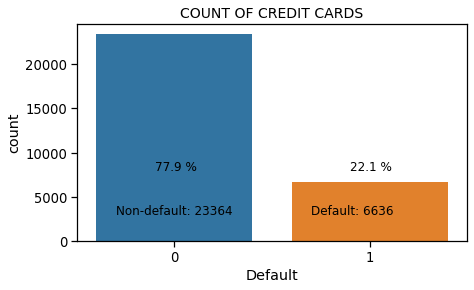

In [39]:
yes = data.Default.sum()
no = len(data)-yes

y_perc = round(yes/len(data)*100, 1)
n_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, )
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(n_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(y_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)

In [45]:
X = data.drop('Default', axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)



Using Logistics Rgression for prediction



In [40]:
param_grid = {'C': np.logspace(-5, 8, 20)}

logreg = LogisticRegression(solver="liblinear")


logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 20691380.811147902}


In [46]:
LR = LogisticRegression(C=0.00005, random_state=0, solver="liblinear")
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

cv_scores =cross_val_score(LR, X, y, cv=5)

print()
print(classification_report(y_test, y_pred))
print()




Accuracy: 0.7788333333333334

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000




C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




Using Random Forest Classifier for prediction



In [33]:
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 5, 'criterion': 'entropy'}


In [42]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 200, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

cv_scores =cross_val_score(Ran, X, y, cv=5)

print()
print(classification_report(y_test, y_pred))
print()



Accuracy: 0.8173333333333334

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


